In [1]:
## import all the necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#plt.style.use('ggplot')
import matplotlib.patches as mpatches

In [2]:
## read first data set
df = pd.read_csv(r'C:\Users\Nil\Downloads\Product_Data_Analytics_test_case_\n26_funnel_steps.csv')

In [3]:
df.head(3)

,user_id,funnel_step,timestamp
0,b64caac4-c6a8-4b85-b504-2bbd3e28e175,sign_up_initiated,2019-01-05 23:00:00
1,77d7332a-3220-49e2-bd86-780a421926ac,sign_up_initiated,2019-01-27 02:00:00
2,24fcc884-8938-49f1-ae3b-3d33ed3a9c53,sign_up_initiated,2019-01-30 02:00:00


In [4]:
## check for missing values parcentage calculations 
round(100 *df.isna().sum() / df.shape[0], 2).to_frame()

,0
user_id,0.0
funnel_step,0.0
timestamp,0.0


In [5]:
df["funnel_step"].unique()

array(['sign_up_initiated', 'sign_up_completed', 'kyc_completed',
       'first_deposit'], dtype=object)

In [6]:
df1= df.drop_duplicates() # it will keep the 1st occurance of the duplicated rows and delete the other rows.

In [7]:
df1.shape

(52412, 3)

In [8]:
## read the second dataset
df_user = pd.read_csv(r'C:\Users\Nil\Downloads\Product_Data_Analytics_test_case_\n26_users.csv')

In [9]:
df_user.head(3)

,user_id,channel,market,platform,age
0,b64caac4-c6a8-4b85-b504-2bbd3e28e175,organic,FRA,ios,35
1,77d7332a-3220-49e2-bd86-780a421926ac,organic,FRA,ios,20
2,24fcc884-8938-49f1-ae3b-3d33ed3a9c53,paid_social,FRA,ios,25


In [10]:
## check for missing values parcentage calculations 
round(100 *df_user.isna().sum() / df_user.shape[0], 2).to_frame()

,0
user_id,0.0
channel,0.0
market,0.0
platform,0.0
age,0.0


In [11]:
df_user.shape

(21229, 5)

In [12]:
df1_user= df_user.drop_duplicates() # it will keep the 1st occurance of the duplicated rows and delete the other rows.

In [13]:
df1_user.shape

(21229, 5)

In [14]:
## checking inconsistency in user_ids

df1_user["user_id"].nunique(), df1["user_id"].nunique()

(21229, 21315)

In [15]:
## this shows the number of user which does not have user details
df1["user_id"].nunique() - df1_user["user_id"].nunique()

86

In [16]:
## inner join on user_id to remove extra user_id which has no additional information

df_merged= pd.merge(df1, df1_user, on = ["user_id"], how='inner')
df_merged.head(5)

,user_id,funnel_step,timestamp,channel,market,platform,age
0,b64caac4-c6a8-4b85-b504-2bbd3e28e175,sign_up_initiated,2019-01-05 23:00:00,organic,FRA,ios,35
1,b64caac4-c6a8-4b85-b504-2bbd3e28e175,sign_up_completed,2019-01-07 11:00:00,organic,FRA,ios,35
2,b64caac4-c6a8-4b85-b504-2bbd3e28e175,kyc_completed,2019-01-14 01:00:00,organic,FRA,ios,35
3,77d7332a-3220-49e2-bd86-780a421926ac,sign_up_initiated,2019-01-27 02:00:00,organic,FRA,ios,20
4,77d7332a-3220-49e2-bd86-780a421926ac,sign_up_completed,2019-01-28 12:00:00,organic,FRA,ios,20


In [17]:
## missing value check in the marged dataframe
 
round(100 *df_merged.isna().sum() / df_merged.shape[0], 2).to_frame()

,0
user_id,0.0
funnel_step,0.0
timestamp,0.0
channel,0.0
market,0.0
platform,0.0
age,0.0


In [18]:
## check for duplicate rows
df_cleaned= df_merged.drop_duplicates()
df_cleaned.shape

(52158, 7)

In [19]:
## Add age group
## we are goruping the ages to do further analysis

bins= [17,20,30,50,75,130]
labels = ['Teen','Young','Mid-age','Old','Very_old']
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['age'], bins=bins, labels=labels, right=False)

df_cleaned.head(3)

,user_id,funnel_step,timestamp,channel,market,platform,age,AgeGroup
0,b64caac4-c6a8-4b85-b504-2bbd3e28e175,sign_up_initiated,2019-01-05 23:00:00,organic,FRA,ios,35,Mid-age
1,b64caac4-c6a8-4b85-b504-2bbd3e28e175,sign_up_completed,2019-01-07 11:00:00,organic,FRA,ios,35,Mid-age
2,b64caac4-c6a8-4b85-b504-2bbd3e28e175,kyc_completed,2019-01-14 01:00:00,organic,FRA,ios,35,Mid-age


array([<AxesSubplot:ylabel='age'>], dtype=object)

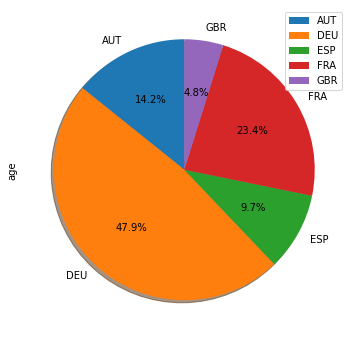

In [20]:
## check country wise customer percentage

df_unique = df_cleaned.drop_duplicates(subset="user_id", keep="first")

df_unique.groupby(['market']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(8,6), autopct='%1.1f%%')


array([<AxesSubplot:ylabel='age'>], dtype=object)

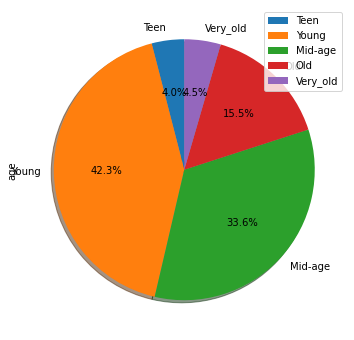

In [21]:
## Age group wise customer percentage
df_unique.groupby(['AgeGroup']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(8,6), autopct='%1.1f%%')


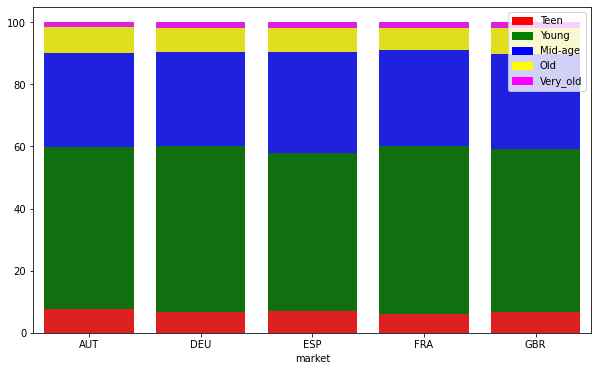

In [22]:
## Age group percentage in different market

stack1 = df_unique[df_unique["AgeGroup"]=="Teen"].groupby("market")["market"].count()
stack2 = df_unique[df_unique["AgeGroup"].isin(['Teen','Young'])].groupby("market")["market"].count()
stack3 = df_unique[df_unique["AgeGroup"].isin(['Teen','Young','Mid-age'])].groupby("market")["market"].count()
stack4 = df_unique[df_unique["AgeGroup"].isin(['Teen','Young','Mid-age','Old'])].groupby("market")["market"].count()
stack5 = df_unique[df_unique["AgeGroup"].isin(['Teen','Young','Mid-age','Old','Very_old'])].groupby("market")["market"].count()
stack1= (stack1/stack5) *100
stack2= (stack2/stack5) *100
stack3= (stack3/stack5) *100
stack4 = (stack4/stack5) * 100
stack5 = (stack5/stack5) * 100


plt.figure(figsize=(10,6))

bar5 = sb.barplot(x=stack5.index,  y= stack5.values, color='magenta')
bar4 = sb.barplot(x=stack4.index,  y= stack4.values, color='yellow')
bar3 = sb.barplot(x=stack3.index,  y= stack3.values, color='blue')
bar2 = sb.barplot(x=stack2.index,  y= stack2.values, color='green')
bar1 = sb.barplot(x=stack1.index,  y= stack1.values, color='red')
bar_1  = mpatches.Patch(color='red', label='Teen')
bar_2  = mpatches.Patch(color='green', label='Young')
bar_3  = mpatches.Patch(color='blue', label='Mid-age')
bar_4  = mpatches.Patch(color='yellow', label='Old')
bar_5  = mpatches.Patch(color='magenta', label='Very_old')
plt.legend(handles=[bar_1,bar_2,bar_3,bar_4,bar_5])


# show the graph
plt.show()

array([<AxesSubplot:ylabel='age'>], dtype=object)

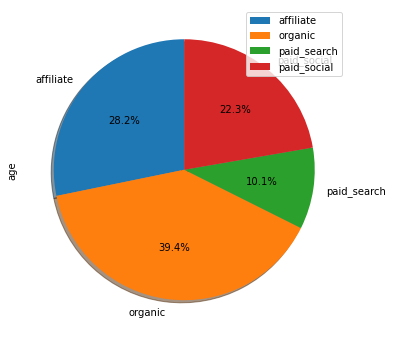

In [23]:
## channel wise customer percentage

df_unique.groupby(['channel']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(8,6), autopct='%1.1f%%')


In [24]:
df_unique.head(3)

,user_id,funnel_step,timestamp,channel,market,platform,age,AgeGroup
0,b64caac4-c6a8-4b85-b504-2bbd3e28e175,sign_up_initiated,2019-01-05 23:00:00,organic,FRA,ios,35,Mid-age
3,77d7332a-3220-49e2-bd86-780a421926ac,sign_up_initiated,2019-01-27 02:00:00,organic,FRA,ios,20,Young
6,24fcc884-8938-49f1-ae3b-3d33ed3a9c53,sign_up_initiated,2019-01-30 02:00:00,paid_social,FRA,ios,25,Young


array([<AxesSubplot:ylabel='age'>], dtype=object)

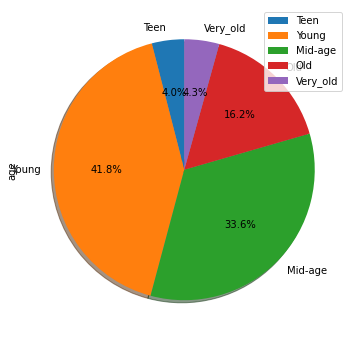

In [25]:
## Age group wise customer percentage when channel is organic
df_unique[df_unique["channel"]== "organic"].groupby(['AgeGroup']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(8,6), autopct='%1.1f%%')


array([<AxesSubplot:ylabel='age'>], dtype=object)

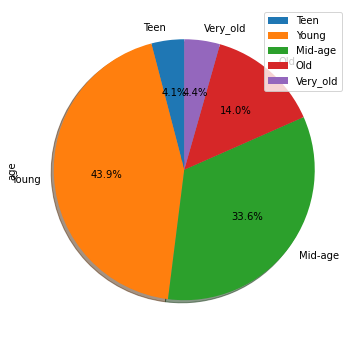

In [26]:
## Age group wise customer percentage when channel is affiliate
df_unique[df_unique["channel"]== "affiliate"].groupby(['AgeGroup']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(8,6), autopct='%1.1f%%')


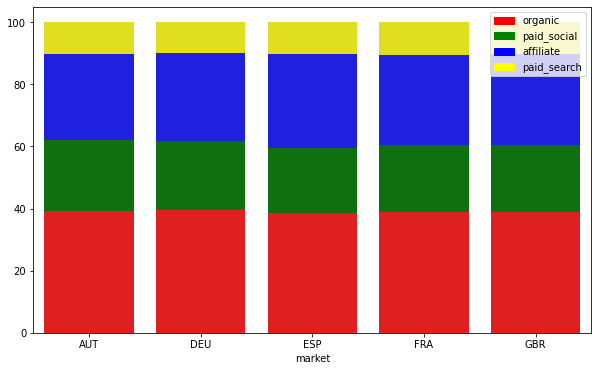

In [27]:
## market wise channel performance percentage

stack1 = df_unique[df_unique["channel"]=="organic"].groupby("market")["market"].count()
stack2 = df_unique[df_unique["channel"].isin(["organic", "paid_social"])].groupby("market")["market"].count()
stack3 = df_unique[df_unique["channel"].isin(["organic", "paid_social","affiliate"])].groupby("market")["market"].count()
stack4 = df_unique[df_unique["channel"].isin(["organic", "paid_social","affiliate","paid_search"])].groupby("market")["market"].count()
stack1= (stack1/stack4) *100
stack2= (stack2/stack4) *100
stack3= (stack3/stack4) *100
stack4 = stack4/stack4 * 100


plt.figure(figsize=(10,6))

bar4 = sb.barplot(x=stack4.index,  y= stack4.values, color='yellow')
bar3 = sb.barplot(x=stack3.index,  y= stack3.values, color='blue')
bar2 = sb.barplot(x=stack2.index,  y= stack2.values, color='green')
bar1 = sb.barplot(x=stack1.index,  y= stack1.values, color='red')
bar_1  = mpatches.Patch(color='red', label='organic')
bar_2  = mpatches.Patch(color='green', label='paid_social')
bar_3  = mpatches.Patch(color='blue', label='affiliate')
bar_4  = mpatches.Patch(color='yellow', label='paid_search')

plt.legend(handles=[bar_1,bar_2,bar_3,bar_4])


# show the graph
plt.show()

array([<AxesSubplot:ylabel='age'>], dtype=object)

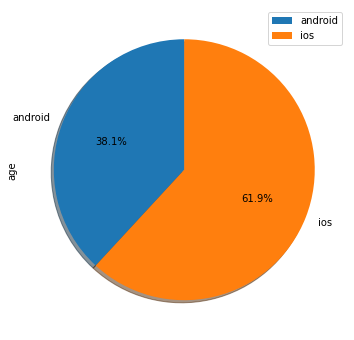

In [28]:
## platform wise customer percentage

df_unique.groupby(['platform']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(8,6), autopct='%1.1f%%')


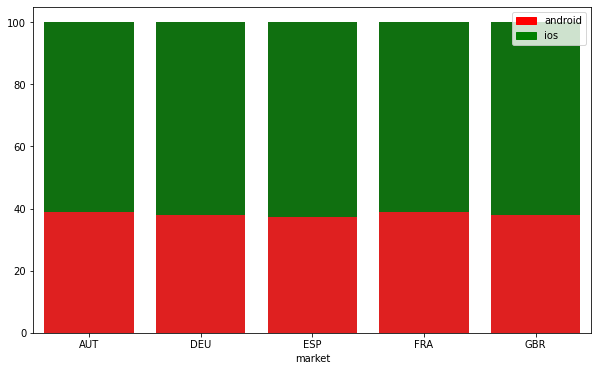

In [29]:
## platform wise percentage in different market

stack1 = df_unique[df_unique["platform"]=="android"].groupby("market")["market"].count()
stack2 = df_unique[df_unique["platform"].isin(['android','ios'])].groupby("market")["market"].count()

stack1= (stack1/stack2) *100
stack2= (stack2/stack2) *100



plt.figure(figsize=(10,6))


bar2 = sb.barplot(x=stack2.index,  y= stack2.values, color='green')
bar1 = sb.barplot(x=stack1.index,  y= stack1.values, color='red')
bar_1  = mpatches.Patch(color='red', label='android')
bar_2  = mpatches.Patch(color='green', label='ios')

plt.legend(handles=[bar_1,bar_2])


# show the graph
plt.show()

In [30]:
## convert timestamp to datetime field
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])

In [31]:
## this sell check time required by customers from sign_up_initiated to sign_up_completed

df_funnel_comp = df_merged.loc[df_merged['funnel_step'].isin(["sign_up_initiated","sign_up_completed"])]

start = df_funnel_comp[df_funnel_comp["funnel_step"]== "sign_up_initiated"].groupby(["user_id"])['timestamp'].last()
end = df_funnel_comp[df_funnel_comp["funnel_step"]== "sign_up_completed"].groupby(["user_id"])['timestamp'].last()

new_frame = (end - start).apply(lambda x : x.days ).to_frame().dropna()
new_frame_merged= pd.merge(df_funnel_comp, new_frame, on = ["user_id"], how='inner')
new_frame_merged = new_frame_merged.drop_duplicates(subset="user_id", keep="first")
new_frame_merged.head(5)

,user_id,funnel_step,timestamp_x,channel,market,platform,age,timestamp_y
0,b64caac4-c6a8-4b85-b504-2bbd3e28e175,sign_up_initiated,2019-01-05 23:00:00,organic,FRA,ios,35,1.0
2,77d7332a-3220-49e2-bd86-780a421926ac,sign_up_initiated,2019-01-27 02:00:00,organic,FRA,ios,20,1.0
4,55b9ab0e-72b8-4751-8225-623014cb877f,sign_up_initiated,2019-01-28 14:00:00,affiliate,FRA,ios,24,1.0
6,11f32569-a4b1-4850-a90a-e535e6242168,sign_up_initiated,2019-01-02 04:00:00,organic,FRA,ios,23,0.0
8,fa301541-754a-4afb-aa81-f58c0f6b4448,sign_up_initiated,2019-01-13 05:00:00,paid_search,FRA,android,77,1.0


<AxesSubplot:xlabel='market', ylabel='timestamp_y'>

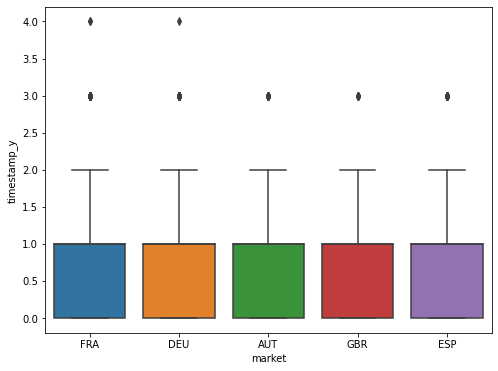

In [32]:
## relation between market and sign_up_initiated to sign_up_completed

plt.figure(figsize=(8,6))
sb.boxplot(x=new_frame_merged["market"],
          y=new_frame_merged["timestamp_y"],
          
          )

In [33]:
## this sell check time required by customers from sign_up_initiated to kyc_completed

df_funnel_comp1 = df_merged.loc[df_merged['funnel_step'].isin(["sign_up_initiated","kyc_completed"])]

start1 = df_funnel_comp1[df_funnel_comp1["funnel_step"]== "sign_up_initiated"].groupby(["user_id"])['timestamp'].last()
end1 = df_funnel_comp1[df_funnel_comp1["funnel_step"]== "kyc_completed"].groupby(["user_id"])['timestamp'].last()

new_frame1 = (end1 - start1).apply(lambda x : x.days ).to_frame().dropna()
new_frame_merged1= pd.merge(df_funnel_comp1, new_frame1, on = ["user_id"], how='inner')
new_frame_merged1 = new_frame_merged1.drop_duplicates(subset="user_id", keep="first")
new_frame_merged1.head(5)

,user_id,funnel_step,timestamp_x,channel,market,platform,age,timestamp_y
0,b64caac4-c6a8-4b85-b504-2bbd3e28e175,sign_up_initiated,2019-01-05 23:00:00,organic,FRA,ios,35,8.0
2,77d7332a-3220-49e2-bd86-780a421926ac,sign_up_initiated,2019-01-27 02:00:00,organic,FRA,ios,20,7.0
4,55b9ab0e-72b8-4751-8225-623014cb877f,sign_up_initiated,2019-01-28 14:00:00,affiliate,FRA,ios,24,8.0
6,11f32569-a4b1-4850-a90a-e535e6242168,sign_up_initiated,2019-01-02 04:00:00,organic,FRA,ios,23,7.0
8,fa301541-754a-4afb-aa81-f58c0f6b4448,sign_up_initiated,2019-01-13 05:00:00,paid_search,FRA,android,77,7.0


<AxesSubplot:xlabel='market', ylabel='timestamp_y'>

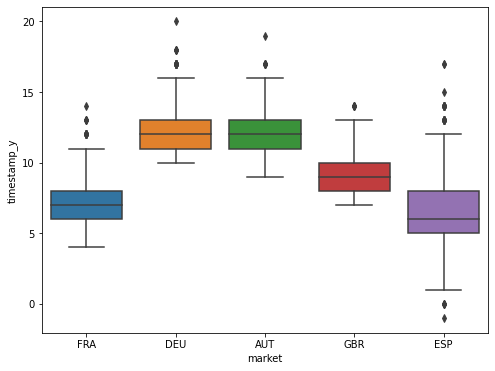

In [34]:
## relation between market and sign_up_initiated to kyc_completed
plt.figure(figsize=(8,6))
sb.boxplot(x=new_frame_merged1["market"],
          y=new_frame_merged1["timestamp_y"],
          
          )

In [35]:
## this sell check time required by customers from sign_up_initiated to first_deposit

df_funnel_comp2 = df_merged.loc[df_merged['funnel_step'].isin(["sign_up_initiated","first_deposit"])]

start2 = df_funnel_comp2[df_funnel_comp2["funnel_step"]== "sign_up_initiated"].groupby(["user_id"])['timestamp'].last()
end2 = df_funnel_comp2[df_funnel_comp2["funnel_step"]== "first_deposit"].groupby(["user_id"])['timestamp'].last()

new_frame2 = (end2 - start2).apply(lambda x : x.days ).to_frame().dropna()
new_frame_merged2= pd.merge(df_funnel_comp2, new_frame2, on = ["user_id"], how='inner')
new_frame_merged2 = new_frame_merged2.drop_duplicates(subset="user_id", keep="first")
new_frame_merged2.head(5)

,user_id,funnel_step,timestamp_x,channel,market,platform,age,timestamp_y
0,1717ae53-59fa-4f18-8a7f-6a78bf215521,sign_up_initiated,2019-01-14 20:00:00,organic,FRA,ios,26,12.0
2,ba3fd7f7-64bb-4013-b15c-8b575fafaf34,sign_up_initiated,2019-01-17 04:00:00,organic,FRA,android,29,15.0
4,101f725a-18f6-4cfd-916f-2bb498a6b0a8,sign_up_initiated,2019-01-19 13:00:00,organic,FRA,ios,21,21.0
6,4f4e7c52-6b0d-4e83-ae65-66db074863f6,sign_up_initiated,2019-01-15 17:00:00,organic,FRA,android,19,16.0
8,006d3e88-c32f-451b-93e0-7d918e0ced8a,sign_up_initiated,2019-01-23 11:00:00,organic,FRA,ios,24,12.0


<AxesSubplot:xlabel='market', ylabel='timestamp_y'>

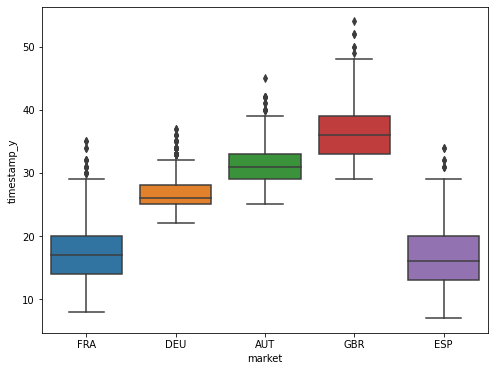

In [36]:
## relation between market and sign_up_initiated to first_deposit
plt.figure(figsize=(8,6))
sb.boxplot(x=new_frame_merged2["market"],
          y=new_frame_merged2["timestamp_y"],
          
          )

<AxesSubplot:xlabel='market', ylabel='timestamp_y'>

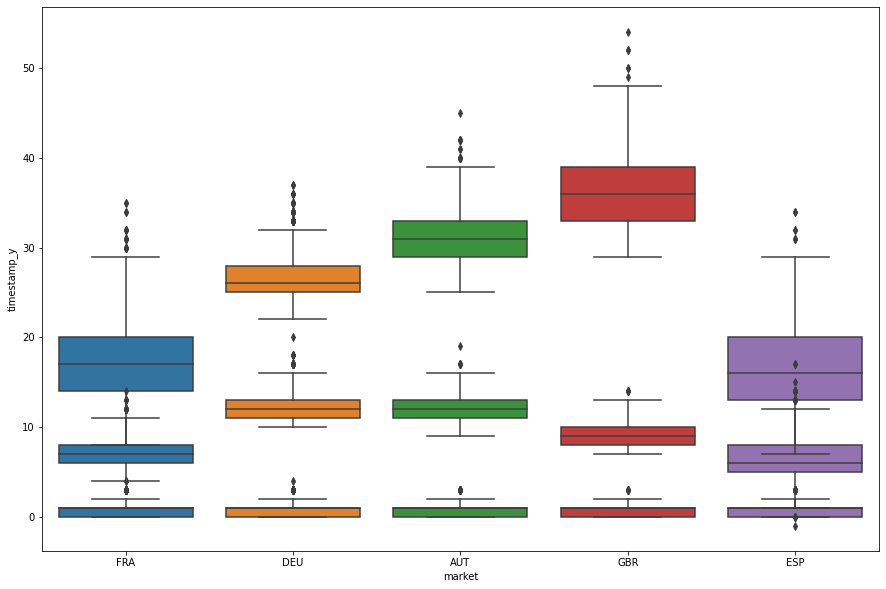

In [37]:
## All the market wise different funnel time frame relations (Y axis in days)

plt.figure(figsize=(15,10))
sb.boxplot(x=new_frame_merged["market"],
          y=new_frame_merged["timestamp_y"],
          
          )


sb.boxplot(x=new_frame_merged1["market"],
          y=new_frame_merged1["timestamp_y"],
          
          )

sb.boxplot(x=new_frame_merged2["market"],
          y=new_frame_merged2["timestamp_y"],
          
          )

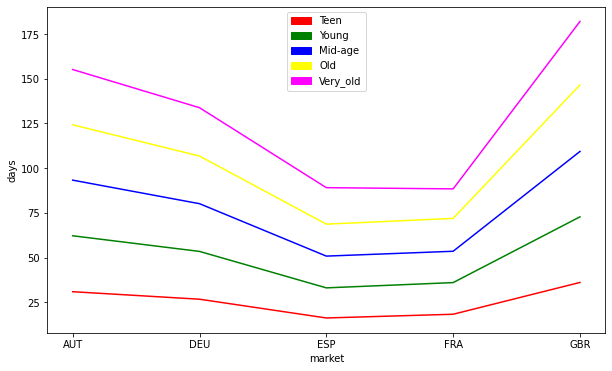

In [38]:
## mean line graph vs time frame (days) in different market 
## this is for the sign_up_initiated to first_deposit datasets

bins= [17,20,30,50,75,130]
labels = ['Teen','Young','Mid-age','Old','Very_old']
new_frame_merged2['AgeGroup'] = pd.cut(new_frame_merged2['age'], bins=bins, labels=labels, right=False)
# df_unique = new_frame_merged2.copy()
stack1 = new_frame_merged2[new_frame_merged2["AgeGroup"]=="Teen"].groupby("market")["timestamp_y"].mean()
stack2 = new_frame_merged2[new_frame_merged2["AgeGroup"]=="Teen"].groupby("market")["timestamp_y"].mean() + new_frame_merged2[new_frame_merged2["AgeGroup"]=="Young"].groupby("market")["timestamp_y"].mean()
stack3 = stack2 + new_frame_merged2[new_frame_merged2["AgeGroup"].isin(['Mid-age'])].groupby("market")["timestamp_y"].mean()
stack4 = stack3 + new_frame_merged2[new_frame_merged2["AgeGroup"].isin(['Old'])].groupby("market")["timestamp_y"].mean()
stack5 = stack4 + new_frame_merged2[new_frame_merged2["AgeGroup"].isin(['Very_old'])].groupby("market")["timestamp_y"].mean()



plt.figure(figsize=(10,6))
plt.axes().set_ylabel('days')

bar5 = sb.lineplot(x=stack5.index,  y= stack5.values, color='magenta')
bar4 = sb.lineplot(x=stack4.index,  y= stack4.values, color='yellow')
bar3 = sb.lineplot(x=stack3.index,  y= stack3.values, color='blue')
bar2 = sb.lineplot(x=stack2.index,  y= stack2.values, color='green')
bar1 = sb.lineplot(x=stack1.index,  y= stack1.values, color='red')
bar_1  = mpatches.Patch(color='red', label='Teen')
bar_2  = mpatches.Patch(color='green', label='Young')
bar_3  = mpatches.Patch(color='blue', label='Mid-age')
bar_4  = mpatches.Patch(color='yellow', label='Old')
bar_5  = mpatches.Patch(color='magenta', label='Very_old')
plt.legend(handles=[bar_1,bar_2,bar_3,bar_4,bar_5])


# show the graph
plt.show()

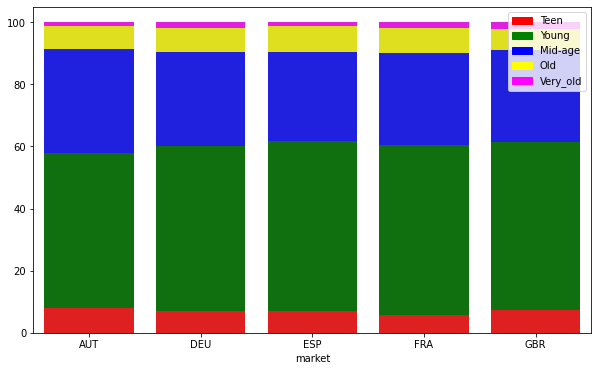

In [39]:
## check the age group wise sign_up_initiated to first_deposit datasets vs market


stack1 = new_frame_merged2[new_frame_merged2["AgeGroup"]=="Teen"].groupby("market")["market"].count()
stack2 = new_frame_merged2[new_frame_merged2["AgeGroup"].isin(['Teen','Young'])].groupby("market")["market"].count()
stack3 = new_frame_merged2[new_frame_merged2["AgeGroup"].isin(['Teen','Young','Mid-age'])].groupby("market")["market"].count()
stack4 = new_frame_merged2[new_frame_merged2["AgeGroup"].isin(['Teen','Young','Mid-age','Old'])].groupby("market")["market"].count()
stack5 = new_frame_merged2[new_frame_merged2["AgeGroup"].isin(['Teen','Young','Mid-age','Old','Very_old'])].groupby("market")["market"].count()
stack1= (stack1/stack5) *100
stack2= (stack2/stack5) *100
stack3= (stack3/stack5) *100
stack4 = (stack4/stack5) * 100
stack5 = (stack5/stack5) * 100


plt.figure(figsize=(10,6))

bar5 = sb.barplot(x=stack5.index,  y= stack5.values, color='magenta')
bar4 = sb.barplot(x=stack4.index,  y= stack4.values, color='yellow')
bar3 = sb.barplot(x=stack3.index,  y= stack3.values, color='blue')
bar2 = sb.barplot(x=stack2.index,  y= stack2.values, color='green')
bar1 = sb.barplot(x=stack1.index,  y= stack1.values, color='red')
bar_1  = mpatches.Patch(color='red', label='Teen')
bar_2  = mpatches.Patch(color='green', label='Young')
bar_3  = mpatches.Patch(color='blue', label='Mid-age')
bar_4  = mpatches.Patch(color='yellow', label='Old')
bar_5  = mpatches.Patch(color='magenta', label='Very_old')
plt.legend(handles=[bar_1,bar_2,bar_3,bar_4,bar_5])


# show the graph
plt.show()